In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from facemesh_pytorch import FaceMesh

In [2]:
net = FaceMesh()
net.load_state_dict(torch.load('../models/pytorch/FaceMesh.pth'))

<All keys matched successfully>

(1000, 1000, 3)


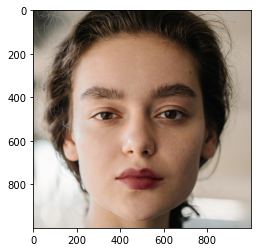

In [3]:
raw_image = cv2.imread("../images/face.jpg")
image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)

In [4]:
image = cv2.resize(image, (192, 192))
float_image = image.astype(np.float32)/127.5-1.0
tensor = torch.from_numpy(float_image).permute((2, 0, 1)).unsqueeze(0)
tensor.size()

torch.Size([1, 3, 192, 192])

In [5]:
result, confidences = net(tensor)
print(result.shape)
print(confidences.shape)

torch.Size([1, 1404])
torch.Size([1, 1])


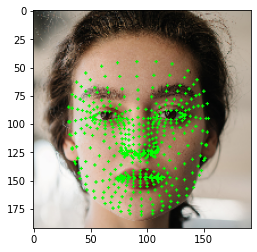

In [6]:
result = result[0].detach().numpy().reshape(-1,3)
for xyz in result:
    cv2.circle(image, (xyz[0], xyz[1]), 1, (0, 255, 0), thickness=-1)
plt.imshow(image)